/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

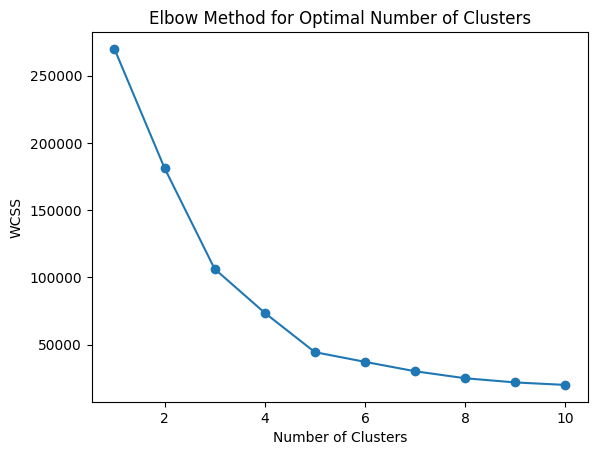

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


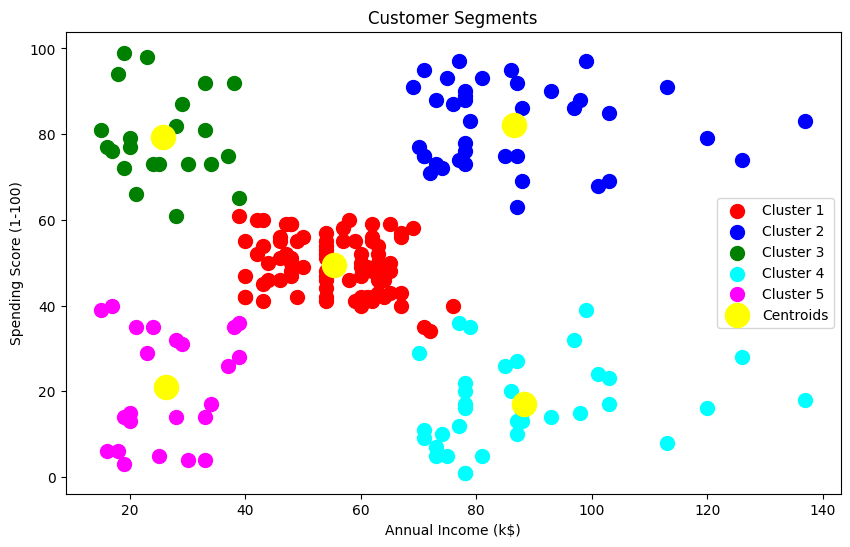

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Selecting relevant features for clustering: 'Annual Income' and 'Spending Score'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans with 5 clusters (based on elbow graph)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Adding the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
